In [8]:
import numpy as np 
try:
    import matplotlib
    matplotlib.rcParams['text.usetex'] = True
except:
    pass
import matplotlib.pyplot as plt
import dcs.localEquilibrium 
from dcs.toroidalField import normalize

In [9]:
surfField_QAS = dcs.localEquilibrium.ArbitrarySurfaceField.readVMEC("wout_QAS.nc") 

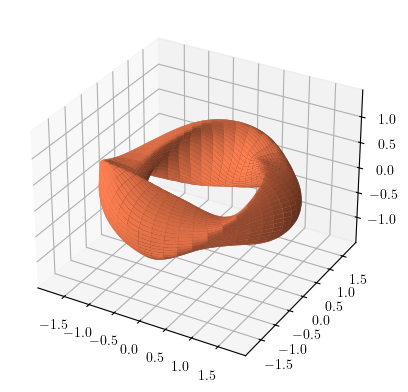

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
_ = surfField_QAS.surf.plot_plt(fig=fig, ax=ax)

In [11]:
surfField_QAS.solveJacobian()
surfField_QAS.solveJacobianReciprocal()

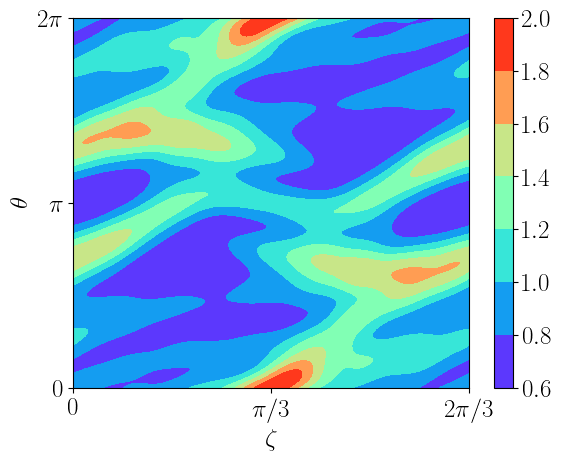

In [12]:
fig, ax = plt.subplots()
# surfField_QAS.plotB(ax=ax, fig=fig)
surfField_QAS.Jacobian.plot_plt(ax=ax, fig=fig)

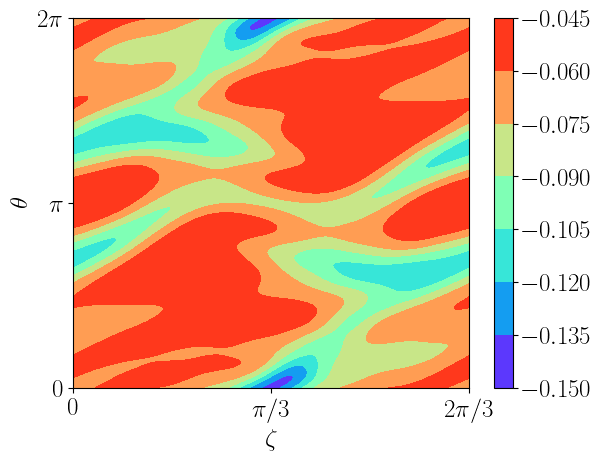

In [13]:
vmecJacobian = dcs.vmec.VMECOut("wout_QAS.nc").getJacobian()

fig, ax = plt.subplots()
vmecJacobian.plot_plt(ax=ax, fig=fig)

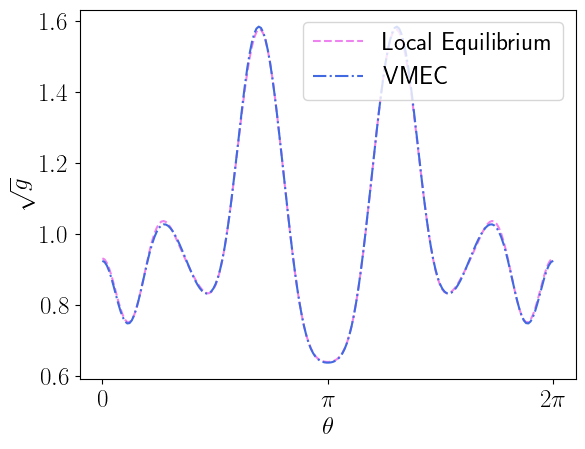

In [15]:
fig, ax = plt.subplots()
zetaValue = 0
ax.plot(
    np.linspace(0,2*np.pi,200), 
    normalize(surfField_QAS.Jacobian).getValue(np.linspace(0,2*np.pi,200),np.ones(200)*zetaValue).flatten(), 
    c = "violet", 
    ls = "--", 
    label = "Local Equilibrium"
)
ax.plot(
    np.linspace(0,2*np.pi,200), 
    normalize(vmecJacobian).getValue(np.linspace(0,2*np.pi,200),np.ones(200)*zetaValue).flatten(), 
    c = "royalblue", 
    ls = "-.", 
    label = "VMEC"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\theta$", fontsize=18)
ax.set_ylabel(r"$\sqrt{g}$", fontsize=18)
ax.set_xticks(np.linspace(0, 2*np.pi, 3))
ax.set_xticklabels(["$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)